## Match Timing in the Egyptian League

## Table of Contents
- Distribution of Matches by Time of Day
- Goals by Time of Day
- Match Outcomes by Time of Day
- Influence Of Cards
- Match outcomes in different periods of the season
- Hypothesis Testing

## Data Loading

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('EgyptianLeague.csv')
data.head()
    

,Unnamed: 0.1,Unnamed: 0,ID,Season,Fixture,MatchDay,Date,Time,Home Team,Away Team,...,Yellow Away,2nd Yellow Home,2nd Yellow Away,Red Home,Red Away,Half Time Result,Full Time Result,Home Goals,Away Goals,Winner
0,0,0,0,2010,Harras El Hodoud x Zamalek SC,1,"Thu, Aug 5, 2010",6:15 PM,Harras El Hodoud,Zamalek SC,...,0,0,0,0,0,1:0,2:2,2,2,Draw
1,1,1,1,2010,Wadi Degla FC x Arab Contractors SC,1,"Thu, Aug 5, 2010",6:15 PM,Wadi Degla FC,Arab Contractors SC,...,0,1,0,0,0,2:1,4:1,4,1,Home
2,2,2,2,2010,Entag El Harby x Smouha SC,1,"Thu, Aug 5, 2010",8:30 PM,Entag El Harby,Smouha SC,...,0,0,0,0,0,0:0,1:0,1,0,Home
3,3,3,3,2010,Ittehad Alexandria x Masr El Makasa,1,"Fri, Aug 6, 2010",6:15 PM,Ittehad Alexandria,Masr El Makasa,...,4,1,0,0,0,1:0,1:1,1,1,Draw
4,4,4,4,2010,Masry Port Said x Tala'ea El Gaish,1,"Fri, Aug 6, 2010",6:15 PM,Masry Port Said,Tala'ea El Gaish,...,2,0,0,0,0,1:0,2:1,2,1,Home


## Distribution of Matches by Time of Day

C:\Users\DELL\AppData\Local\Temp\ipykernel_11448\3276673989.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Match Period'] = pd.to_datetime(data['Time']).dt.hour.apply(lambda x: 'Evening' if x >= 17 else 'Afternoon')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11448\3276673989.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time']).dt.hour


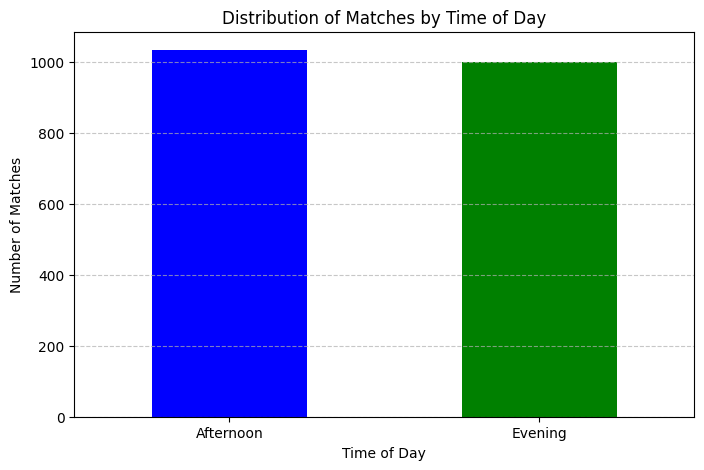

In [3]:
data['Match Period'] = pd.to_datetime(data['Time']).dt.hour.apply(lambda x: 'Evening' if x >= 17 else 'Afternoon')

# Extract hour from the Time column and categorize into 'Afternoon' vs 'Evening'
data['Time'] = pd.to_datetime(data['Time']).dt.hour
data['Match Period'] = data['Time'].apply(lambda x: 'Evening' if x >= 17 else 'Afternoon')

# Plot the distribution of match times
match_time_counts = data['Match Period'].value_counts()

plt.figure(figsize=(8, 5))
match_time_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Matches by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    

This bar chart shows the distribution of matches played in the afternoon versus the evening. 

**Observation**:
- The number of matches is roughly equal between afternoon and evening, providing a balanced dataset for comparison.



## Goals by Time of Day

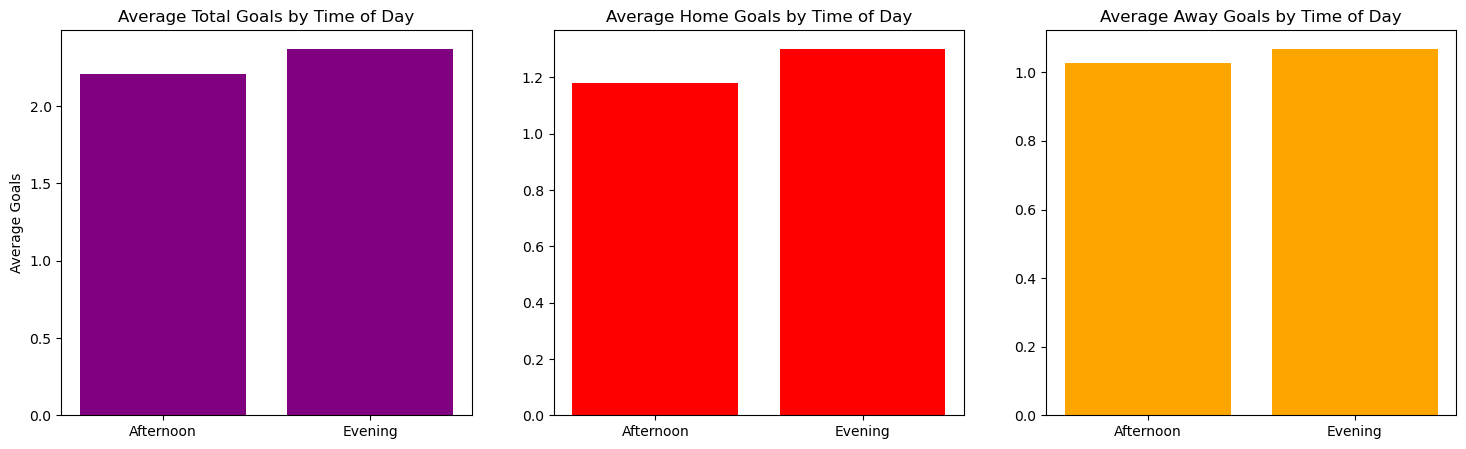

In [62]:
data['Total Goals'] = data['Home Goals'] + data['Away Goals']
average_goals_by_period = data.groupby('Match Period')['Total Goals'].mean()
home_goals_by_period = data.groupby('Match Period')['Home Goals'].mean()
away_goals_by_period = data.groupby('Match Period')['Away Goals'].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].bar(average_goals_by_period.index, average_goals_by_period, color='purple')
axes[0].set_title('Average Total Goals by Time of Day')
axes[0].set_ylabel('Average Goals')
axes[1].bar(home_goals_by_period.index, home_goals_by_period, color='red')
axes[1].set_title('Average Home Goals by Time of Day')
axes[2].bar(away_goals_by_period.index, away_goals_by_period, color='orange')
axes[2].set_title('Average Away Goals by Time of Day')
plt.show()
plt.show()

- Average total goals are slightly higher in the evening compared to the afternoon.


## Match Outcomes by Time of Day

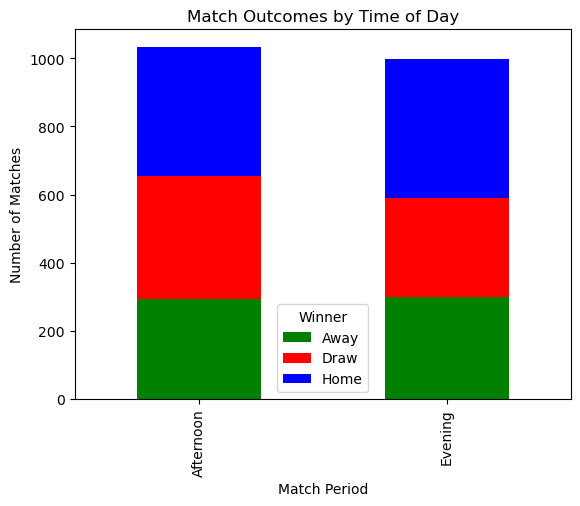

In [59]:

outcomes = pd.crosstab(data['Match Period'], data['Winner'])
outcomes.plot(kind='bar', stacked=True, color=['green', 'red', 'blue'])
plt.title('Match Outcomes by Time of Day')
plt.ylabel('Number of Matches')
plt.show()
    

Afternoon matches tend to have a higher proportion of draws compared to evening matches.

## Influence Of Cards

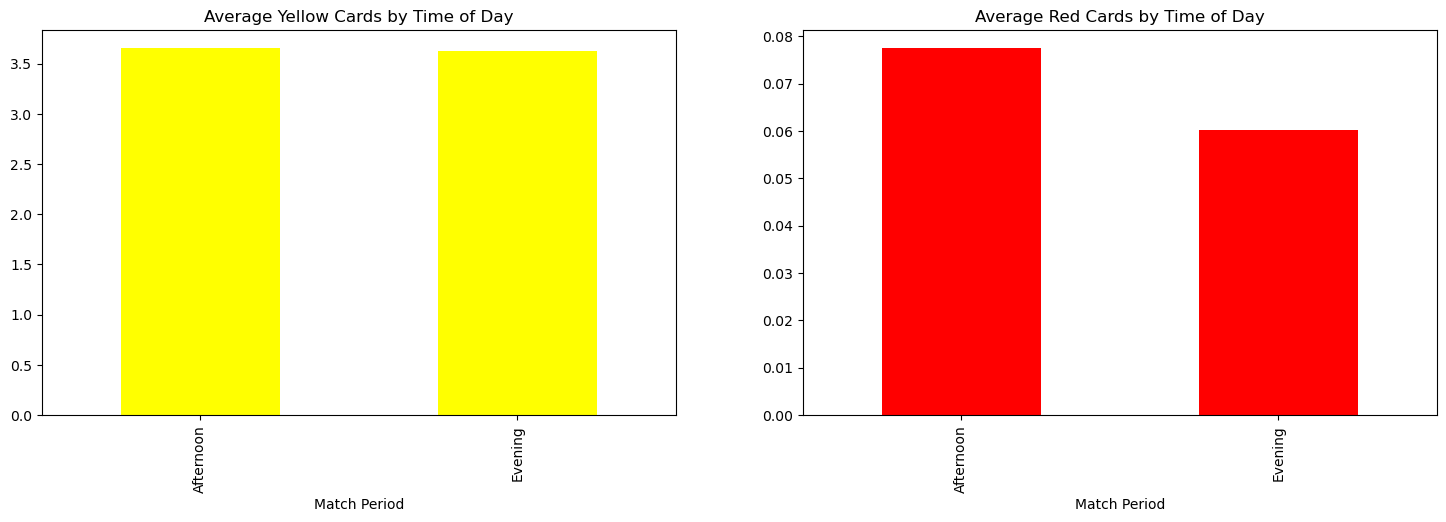

In [65]:

# Influence of Cards
data['Total Yellow Cards'] = data['Yellow Home'] + data['Yellow Away']
data['Total Red Cards'] = data['Red Home'] + data['Red Away']
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
data.groupby('Match Period')['Total Yellow Cards'].mean().plot(kind='bar', ax=axes[0], title='Average Yellow Cards by Time of Day', color='yellow')
data.groupby('Match Period')['Total Red Cards'].mean().plot(kind='bar', ax=axes[1], title='Average Red Cards by Time of Day', color='red')
plt.show()

    

- The number of yellow cards issued is consistent across both time periods.
- Matches played in the afternoon tend to have more red cards issued compared to evening matches


## Match outcomes in different periods of the season

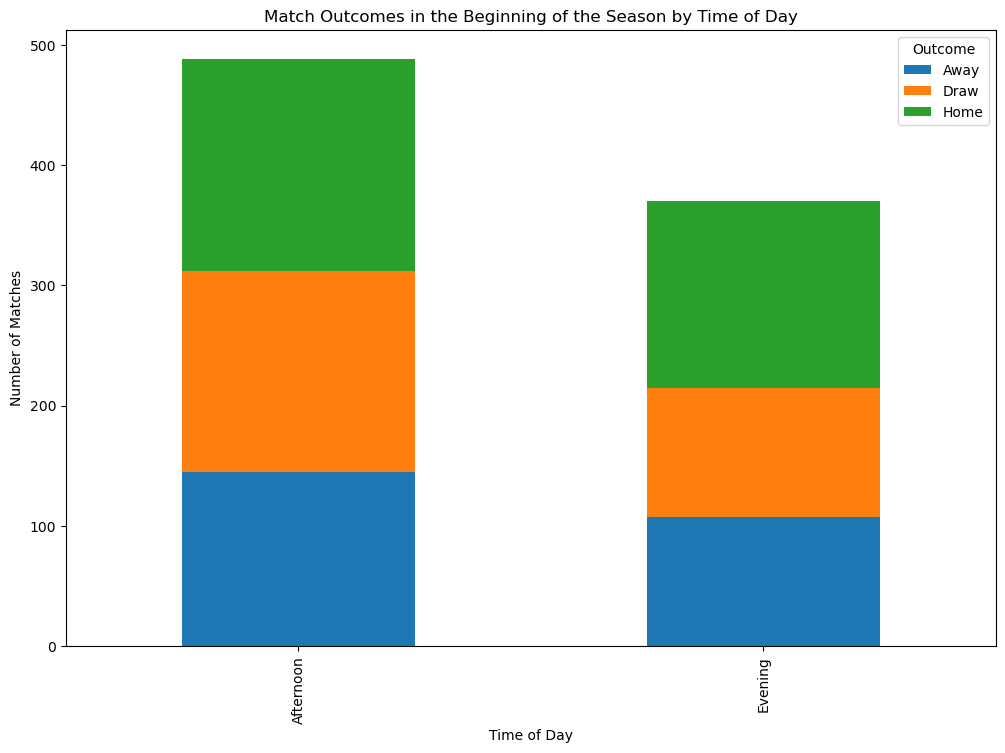

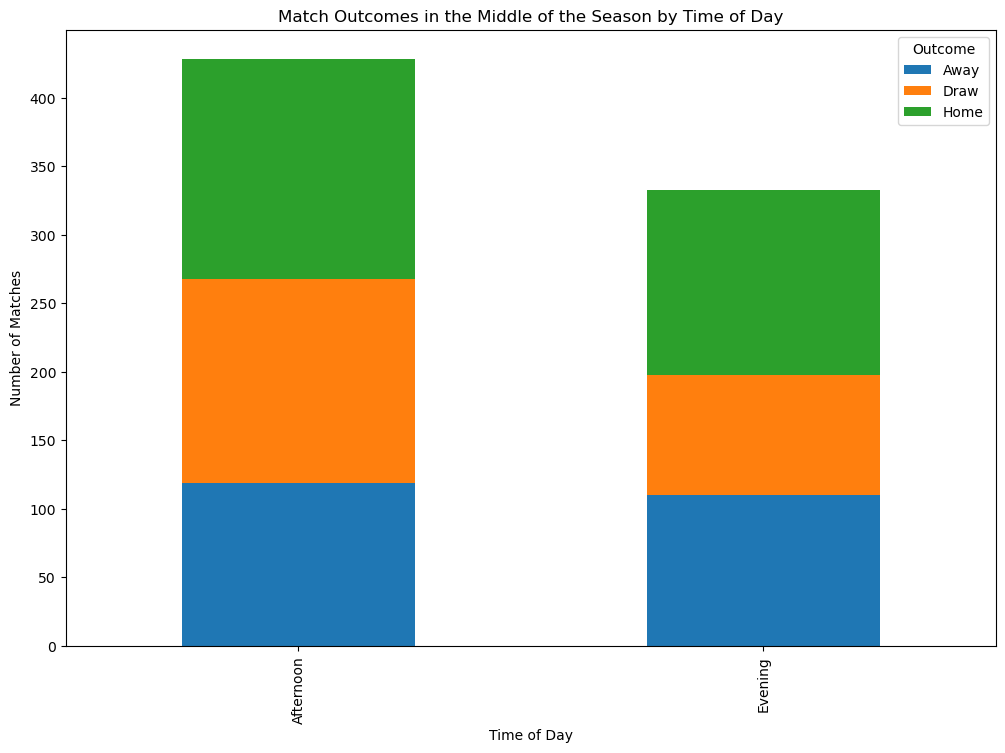

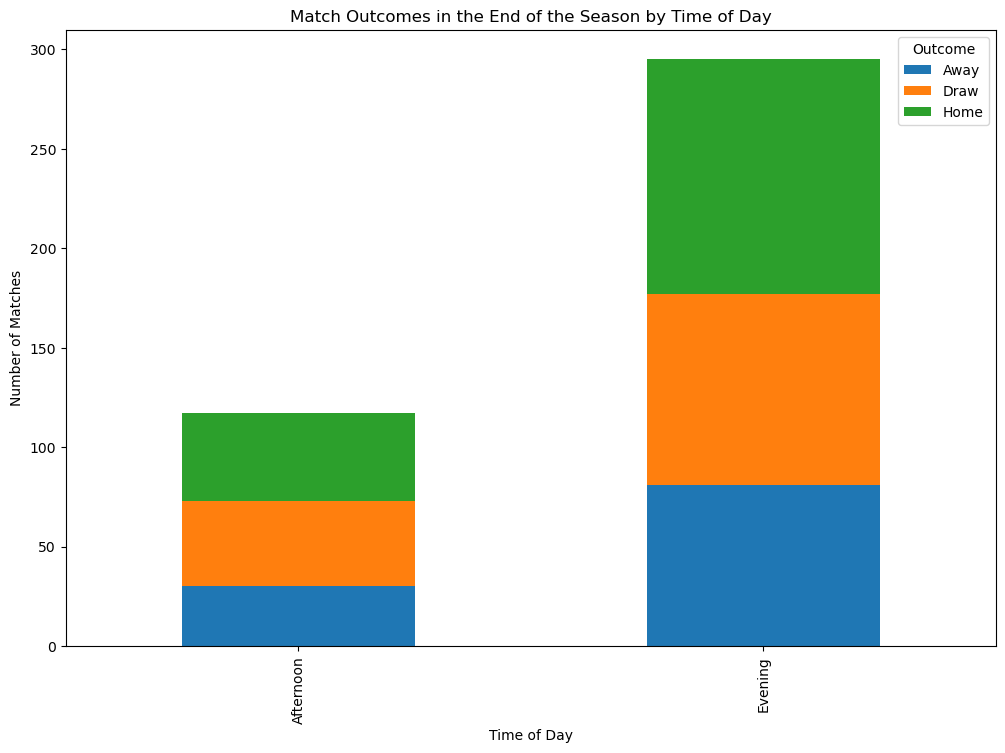

In [64]:
max_day = data['MatchDay'].max()
data['Season Phase'] = pd.cut(data['MatchDay'], bins=[0, max_day/3, 2*max_day/3, max_day], labels=['Beginning', 'Middle', 'End'], include_lowest=True)
for phase in ['Beginning', 'Middle', 'End']:
    phase_data = data[data['Season Phase'] == phase]
    phase_outcomes = pd.crosstab([phase_data['Match Period']], phase_data['Winner'])
    phase_outcomes.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'Match Outcomes in the {phase} of the Season by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Matches')
    plt.legend(title='Outcome')
    plt.show()

- We cant view any insights or trends from the bar chart so we'll prove it statistically using chi-Squared test of independence for each phase

## Hypothesis Testing

In [70]:
from scipy.stats import ttest_ind, chi2_contingency
# T-test for Average Goals
afternoon_goals = data[data['Match Period'] == 'Afternoon']['Total Goals']
evening_goals = data[data['Match Period'] == 'Evening']['Total Goals']

t_stat, p_value = ttest_ind(afternoon_goals, evening_goals, equal_var=False)
print(f"T-Test Results:\nT-Statistic: {t_stat}\nP-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average goals between afternoon and evening matches.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average goals between afternoon and evening matches.")

# Chi-squared Test for Match Outcomes
contingency_table = pd.crosstab(data['Match Period'], data['Winner'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Test Results:\nChi-Squared Statistic: {chi2_stat}\nP-Value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in match outcomes between afternoon and evening matches.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in match outcomes between afternoon and evening matches.")

T-Test Results:
T-Statistic: -2.3355644184217743
P-Value: 0.019611275642676045
Reject the null hypothesis: There is a significant difference in average goals between afternoon and evening matches.
Chi-Squared Test Results:
Chi-Squared Statistic: 7.3165178473606
P-Value: 0.025777354019643678
Reject the null hypothesis: There is a significant difference in match outcomes between afternoon and evening matches.
